In [7]:
!git clone https://github.com/HenryNVP/fastvit-pet-mobile.git
%cd fastvit-pet-mobile

Cloning into 'fastvit-pet-mobile'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 119 (delta 45), reused 81 (delta 21), pack-reused 0 (from 0)
Receiving objects: 100% (119/119), 3.26 MiB | 49.06 MiB/s, done.
Resolving deltas: 100% (45/45), done.
/content/fastvit-pet-mobile/fastvit-pet-mobile


In [8]:
!pip install -r requirements.txt

In [9]:
!pip install performer-pytorch

In [10]:
!python scripts/get_data.py
!python scripts/split_dataset.py

/content/fastvit-pet-mobile/fastvit-pet-mobile/scripts/get_data.py:33: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tf.extractall(destination)
Prepared train=3680 val=1832 test=1837


changed from fastvit_t8 to fastvit_t8_P

In [21]:
!python fastvit/train.py data \
    --model fastvit_t8_P \
    --num-classes 37 \
    -b 192 --lr 1e-3 \
    --epochs 20 \
    --native-amp \
    --output ./output \
    --input-size 3 256 256

/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.12/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
If for semantic segmentation, please install mmsegmentation first
If for detection, please install mmdetection first
/content/fastvit-pet-mobile/fastvit-pet-mobile/fastvit/models/fastvit.py:956: UserWarning: Overwriting fastvit_t8 in registry with fastvit.models.fastvit.fastvit_t8. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  @register_model
/content/fastvit-pet-mobile/fastvit-pet-mo

In [27]:
--native-amp


NameError: name 'native' is not defined

In [28]:
!python fastvit/train.py data \
    --model fastvit_t8_P \
    --num-classes 37 \
    -b 192 --lr 1e-3 \
    --epochs 10 \
    --output ./output \
    --input-size 3 256 256

/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.12/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
If for semantic segmentation, please install mmsegmentation first
If for detection, please install mmdetection first
/content/fastvit-pet-mobile/fastvit-pet-mobile/fastvit/models/fastvit.py:956: UserWarning: Overwriting fastvit_t8 in registry with fastvit.models.fastvit.fastvit_t8. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  @register_model
/content/fastvit-pet-mobile/fastvit-pet-mo

In [37]:
!ls /content/fastvit-pet-mobile/output


20251126-075328-fastvit_t8_P-256


In [44]:
!ls -R /content/fastvit-pet-mobile/fastvit-pet-mobile/output


/content/fastvit-pet-mobile/fastvit-pet-mobile/output:
20251126-080400-fastvit_t8_P-256  20251126-083446-fastvit_t8_P-256
20251126-082011-fastvit_t8_P-256

/content/fastvit-pet-mobile/fastvit-pet-mobile/output/20251126-080400-fastvit_t8_P-256:
args.yaml	      checkpoint-4.pth.tar  checkpoint-9.pth.tar
checkpoint-0.pth.tar  checkpoint-5.pth.tar  last.pth.tar
checkpoint-1.pth.tar  checkpoint-6.pth.tar  model_best.pth.tar
checkpoint-2.pth.tar  checkpoint-7.pth.tar  summary.csv
checkpoint-3.pth.tar  checkpoint-8.pth.tar

/content/fastvit-pet-mobile/fastvit-pet-mobile/output/20251126-082011-fastvit_t8_P-256:
args.yaml	      checkpoint-4.pth.tar  checkpoint-9.pth.tar
checkpoint-0.pth.tar  checkpoint-5.pth.tar  last.pth.tar
checkpoint-1.pth.tar  checkpoint-6.pth.tar  model_best.pth.tar
checkpoint-2.pth.tar  checkpoint-7.pth.tar  summary.csv
checkpoint-3.pth.tar  checkpoint-8.pth.tar

/content/fastvit-pet-mobile/fastvit-pet-mobile/output/20251126-083446-fastvit_t8_P-256:
args.yaml	       check

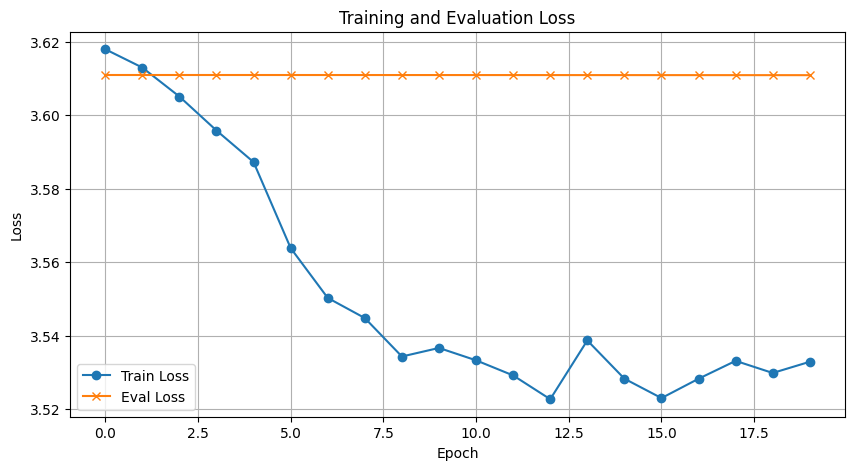

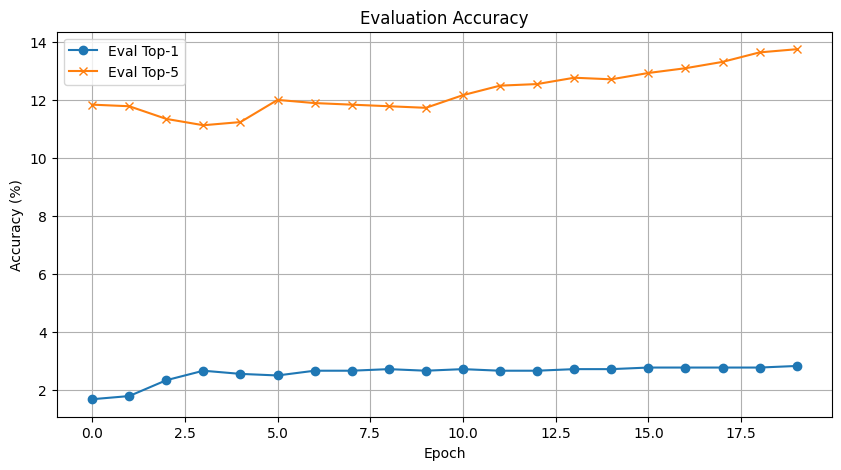

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

summary_path = "/content/fastvit-pet-mobile/fastvit-pet-mobile/output/20251126-083446-fastvit_t8_P-256/summary.csv"
df = pd.read_csv(summary_path)
df.head()


# Plot training and evaluation loss
plt.figure(figsize=(10,5))
plt.plot(df['epoch'], df['train_loss'], label='Train Loss', marker='o')
plt.plot(df['epoch'], df['eval_loss'], label='Eval Loss', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot evaluation Top-1 and Top-5 accuracy
plt.figure(figsize=(10,5))
plt.plot(df['epoch'], df['eval_top1'], label='Eval Top-1', marker='o')
plt.plot(df['epoch'], df['eval_top5'], label='Eval Top-5', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Evaluation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
from timm.models import create_model, load_checkpoint
import fastvit.models as models
from fastvit.models.modules.mobileone import reparameterize_model

tuned_teacher = create_model(
    "fastvit_t8_P",
    pretrained=False,
    num_classes=37,
)

load_checkpoint(tuned_teacher, "/content/fastvit-pet-mobile/fastvit-pet-mobile/output/20251126-083446-fastvit_t8_P-256/model_best.pth.tar", use_ema=False)

tuned_teacher.eval()
tuned_teacher = reparameterize_model(tuned_teacher)
tuned_teacher = tuned_teacher.cuda()

In [51]:
import torch
from PIL import Image
from torchvision import transforms

# Load image
img = Image.open("/content/fastvit-pet-mobile/data/test/Birman/Birman_75.jpg").convert("RGB")

# Preprocessing
preprocess = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

input_tensor = preprocess(img).unsqueeze(0).to("cuda")  # add batch dimension

with torch.no_grad():
    output = tuned_teacher(input_tensor)  # shape: [1, num_classes]
    predicted_class = torch.argmax(output, dim=1)
    print("Predicted class index:", predicted_class.item())

Predicted class index: 7


In [52]:
!python fastvit/validate.py data \
    --model fastvit_t8_P \
    --checkpoint /content/fastvit-pet-mobile/fastvit-pet-mobile/output/20251126-083446-fastvit_t8_P-256/model_best.pth.tar \
    --num-classes 37 \
    --batch-size 128 \
    --input-size 3 256 256 \
    --split test \
    --use-ema \
    --native-amp

/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.12/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
If for semantic segmentation, please install mmsegmentation first
If for detection, please install mmdetection first
/content/fastvit-pet-mobile/fastvit-pet-mobile/fastvit/models/fastvit.py:956: UserWarning: Overwriting fastvit_t8 in registry with fastvit.models.fastvit.fastvit_t8. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  @register_model
/content/fastvit-pet-mobile/fastvit-pet-mo

In [53]:
!pip install onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 90.2 MB/s eta 0:00:00


In [55]:
!python scripts/export_models.py \
    --checkpoint /content/fastvit-pet-mobile/fastvit-pet-mobile/output/20251126-083446-fastvit_t8_P-256/model_best.pth.tar \
    --model fastvit_t8 \
    --num-classes 37 \
    --input-size 256 \
    --reparameterize \
    --subdir teacher

/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.12/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
If for semantic segmentation, please install mmsegmentation first
If for detection, please install mmdetection first
/content/fastvit-pet-mobile/fastvit-pet-mobile/fastvit/models/fastvit.py:956: UserWarning: Overwriting fastvit_t8 in registry with fastvit.models.fastvit.fastvit_t8. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  @register_model
/content/fastvit-pet-mobile/fastvit-pet-mo

In [56]:
!python scripts/benchmark_models.py \
    --checkpoint /content/fastvit-pet-mobile/fastvit-pet-mobile/output/20251126-083446-fastvit_t8_P-256/model_best.pth.tar \
    --model fastvit_t8 \
    --num-classes 37 \
    --input-size 256 \
    --reparameterize \
    --subdir teacher

/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.12/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
If for semantic segmentation, please install mmsegmentation first
If for detection, please install mmdetection first
/content/fastvit-pet-mobile/fastvit-pet-mobile/fastvit/models/fastvit.py:956: UserWarning: Overwriting fastvit_t8 in registry with fastvit.models.fastvit.fastvit_t8. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  @register_model
/content/fastvit-pet-mobile/fastvit-pet-mo